# APS01 - Enunciado

## Imagens, formato RGB e matrizes

Nota: estes exercícios deverão ser entregues via Github Classroom

*Na avaliação as imagens de teste podem ser substituídas por outras imagens similares mas com transformações (por exemplo deslocamento dos objetos) para verificar se seu código defato funciona.*

**Indique os integrantes de seu grupo num arquivo README ou no código fonte**

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.4.0 


## Funções úteis

In [2]:
def plot_hists(img, plt):
    """
        Plota o histograma de cada um dos canais RGB
        img - imagem RGB
        plt - objeto matplotlib
    """
    plt.figure(figsize=(20,10)); 
    img_h = img[:,:,0]
    img_s = img[:,:,1]
    img_v = img[:,:,2]
    histo_plot(img_h, "r","R", plt);
    histo_plot(img_s, "g","G", plt);
    histo_plot(img_v, "b","B", plt);

def make_hist(img_255, c, label, plt):
    """ img_255 - uma imagem com 3 canais de 0 até 255
        c a cor do plot
        label - o label do gráfico
        plt - matplotlib.pyplot
    """
    hist,bins = np.histogram(img_255.flatten(),256,[0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()

    # plt.plot(cdf_normalized, color = c)
    plt.hist(img_255.flatten(),256,[0,256], color = c)
    plt.xlim([0,256])
    plt.legend(label, loc = 'upper left')
    plt.plot()

def histo_plot(img, cor, label, plt):
    """
        img - imagem
        cor - cor
        plt - matplotlib.pyplot object

    """
    plt.figure(figsize=(10,5))
    make_hist(img, cor, label, plt)
    plt.show()
    plt.figure(figsize=(10,5))
    plt.imshow(img, cmap="Greys_r")#, vmin=0, vmax=255)    
    plt.title(label)

# Exercício 01

In [3]:
rintin = cv2.imread("RinTinTin.jpg")

In [4]:
rintin.shape

(239, 318, 3)

In [5]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [6]:
rintin_gray.shape

(239, 318)

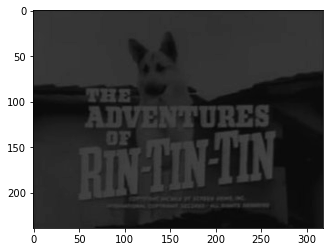

In [7]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

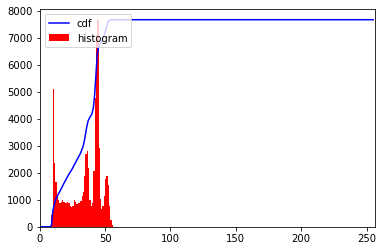

In [192]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 

Trabalhe no arquivo [ex1.py](./ex1.py).

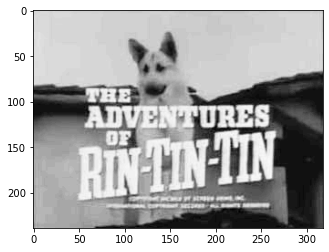

In [195]:
res = rintin_gray.copy()
for i in range(res.shape[0]):
    for j in range(res.shape[1]):
        res[i][j] = 5.1*res[i][j] - 35.7
plt.imshow(res, cmap="Greys_r")

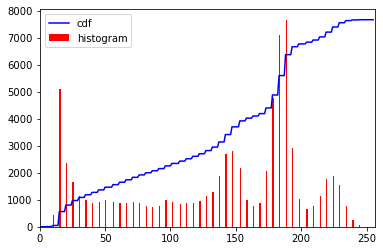

In [196]:
hist,bins = np.histogram(res.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(res.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Exercício 02

Leia com a OpenCV a figura abaixo:

<img src="cena_canto_sala.jpg" width=45% ></img>

Vamos separar os canais  R e B das imagens e analise seus histogramas.

Acompanhe a discussão do professor sobre se R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

*O que você deve fazer*

Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. 

Olhe os exemplos [ExemploFor.ipynb](https://github.com/Insper/robot21.1/blob/main/aula01/aula1_02_ExemploFor.ipynb) e [exemplos de numpy](https://github.com/Insper/robot21.1/blob/main/aula01/aula1_03_numpy.ipynb)


**Trabalhe no arquivo** [ex2.py](./ex2.py)

Análise do histograma (não trabalhe aqui)

<Figure size 1440x720 with 0 Axes>

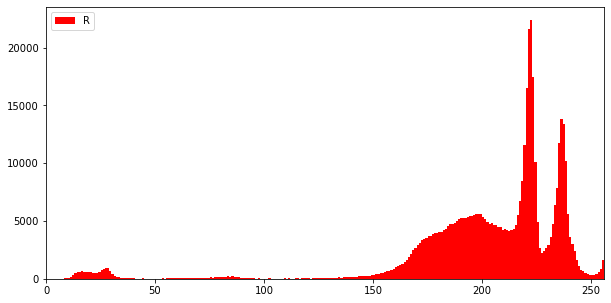

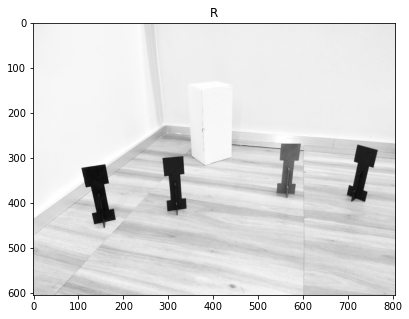

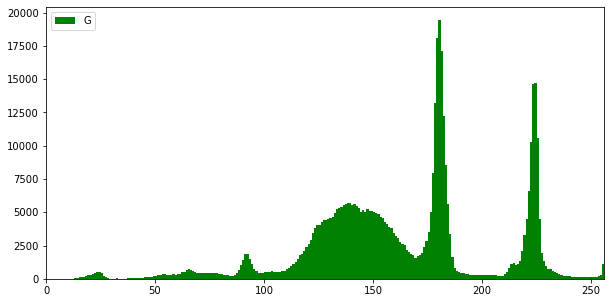

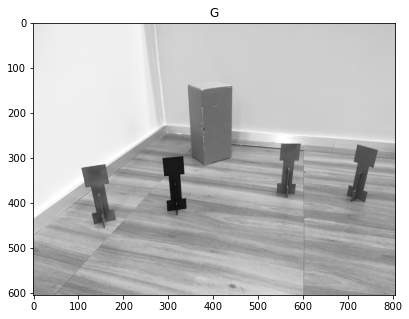

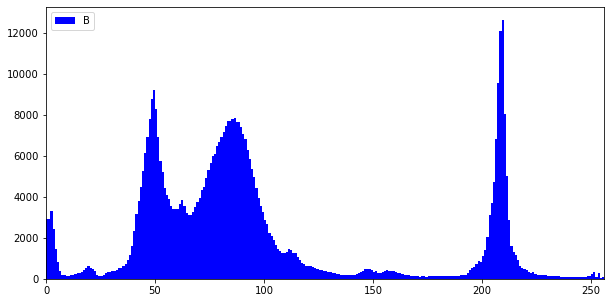

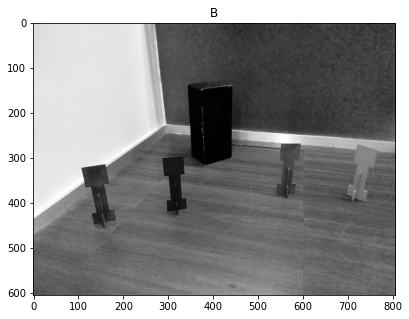

In [9]:
cena = cv2.imread("cena_canto_sala.jpg")
cena = cv2.cvtColor(cena, cv2.COLOR_BGR2RGB)
plot_hists(cena, plt)


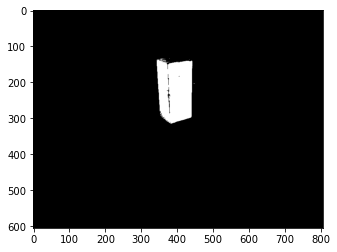

In [78]:
res = cena.copy()
# res[res[:,:,2] >= 50] = [255, 0, 0]
# res[res[:,:,0] <= 225] = [255, 0, 0]
# res[res[:,:,0] < 255] = [255, 255, 255]
res[res[:,:,0] < 210] = [0, 0, 0]
res[res[:,:,2] > 24] = [0, 0, 0]
res[res[:,:,0] > 0] = [255, 255, 255]
plt.imshow(res)

# Exercício 03

O leopardo das neves é um animal que se camufla muito bem em terreno pedregoso e seco. A imagem a seguir mostra este animal

<img src="ex3_recorte_leopardo.png">

Para nos ajudar a localizá-lo foram definidos quadrados de 3x3 azuis e vermelhos.

**O que você deve fazer**:

* Usando código **encontrar** onde está o quadrado vermelho e onde está o quadrado azul

* **Recortar** a imagem usando os cantos definidos pelo quadrado vermelho e azul

* **Salvar** a sub imagem contida no recorte

<img src="leopard_recortado.png" width=400></img>

**Trabalhe** no arquivo [ex3.py](./ex3.py)

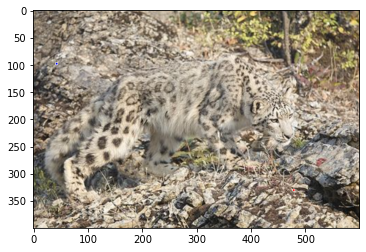

In [82]:
cena = cv2.imread("ex3_recorte_leopardo.png")
cena = cv2.cvtColor(cena, cv2.COLOR_BGR2RGB)
plt.imshow(cena)

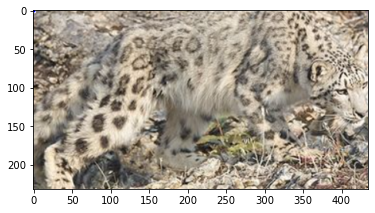

In [128]:
res = cena.copy()

# Encontrando index de pixels vermelhos
vermelho = np.where(res == [255, 0, 0])

# Contando quantos pixels vermelhos por linha
unico_linha, contador_linha = np.unique(vermelho[0], return_counts=True)
ocorrencias_linha = dict(zip(unico_linha, contador_linha))

# Encontrando linha que possui mais pixels vermelhos
y_max = max(ocorrencias_linha, key=ocorrencias_linha.get)

# Contando quantos pixels vermelhos por coluna
unico_coluna, contador_coluna = np.unique(vermelho[1], return_counts=True)
ocorrencias_coluna = dict(zip(unico_coluna, contador_coluna))

# Encontrando coluna que possui mais pixels vermelhos
x_max = max(ocorrencias_coluna, key=ocorrencias_coluna.get)

# Repetindo processo para o quadrado azul..
azul = np.where(res == [0, 0, 255])
unico_linha, contador_linha = np.unique(azul[0], return_counts=True)

ocorrencias_linha = dict(zip(unico_linha, contador_linha))
y_min = max(ocorrencias_linha, key=ocorrencias_linha.get)

unico_coluna, contador_coluna = np.unique(azul[1], return_counts=True)

ocorrencias_coluna = dict(zip(unico_coluna, contador_coluna))
x_min = max(ocorrencias_coluna, key=ocorrencias_coluna.get)

# Recortando imagem
recorte = res[y_min: y_max,x_min: x_max]
plt.imshow(recorte)

# Exercício 04

A imagem fornecida contém a bandeira da Antártida e a do Canadá

<img src="ant_canada_250_160.png"></img>

O que deve ser feito: 
* Usando programação descobrir onde começa e termina a bandeira da Antártida
* Recortar a sub imagem que é a bandeira da Antártida
* Descobrir onde começa e termina a bandeira do Canadá
* Recortar a sub imagme que é a bandeira do Canadá



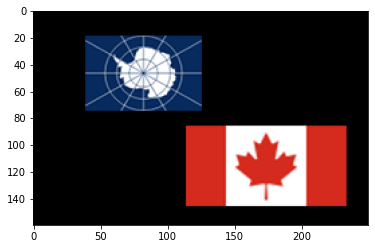

In [130]:
cena = cv2.imread("ant_canada_250_160.png")
cena = cv2.cvtColor(cena, cv2.COLOR_BGR2RGB)
plt.imshow(cena)

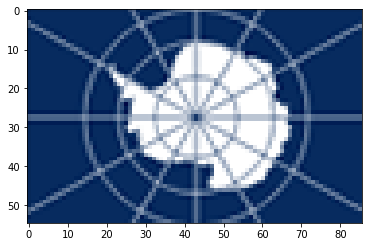

In [181]:
# Antartica
res = cena.copy()
ant = res[0: 80,0: 130]
dif = np.where((ant != [0, 0, 0]))
y_min = dif[0][0]
x_min = dif[1][0]
y_max = dif[0][-1]
x_max = dif[1][-1]

antartica = res[y_min: y_max,x_min: x_max]
plt.imshow(antartica)

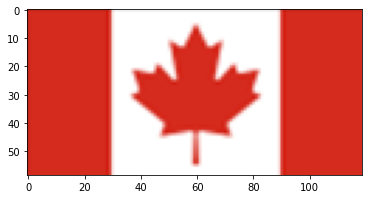

In [190]:
# Canada
res = cena.copy()
can = res[80: 150,100: 250]
dif = np.where(can != [0, 0, 0])

y_min = dif[0][0]
x_min = dif[1][0]
y_max = dif[0][-1]
x_max = dif[1][-1]
canada = res[y_min+80: y_max+80,x_min+100: x_max+100]
plt.imshow(canada)

Trabalhe no arquivo [ex4.py](./ex4.py)

# Exercício 05 (obrigatório para quartetos)


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

<img src="hall_box_battery_atividade5.png" width=400></img>

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_5.png" width=400>

**Nota:** 

Na coluna  de índice `0` não existe pixel anterior

Na última coluna não existe pixel posterior

Trabalhe no arquivo [ex5.py](./ex5.py)

# Exercício 06 (obrigatório para quartetos) 

Você vai trabalhar para imagens que contém alguns `X` feitos em preto e branco

In [11]:
cross = cv2.imread("06_cross_exemplo.png", 0)

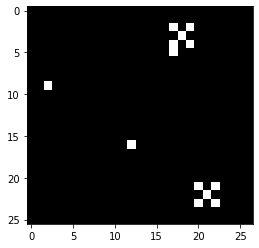

In [12]:
plt.imshow(cross, cmap="Greys_r", vmin=0, vmax=255)

**O que deve ser feito**

Onde houver um padrão parecido com um X este padrão deve ser apagado por um quadrado com valores de pixel 127. 

In [13]:
c_out = cv2.imread("06_cross_exemplo_saida.png", 0)

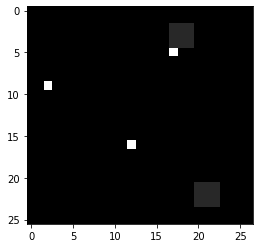

In [14]:
plt.imshow(c_out,cmap="Greys_r", vmin=0, vmax=255)

A imagem que vai ser analisada é a [black_white_dots_cross_80_60.png](./black_white_dots_cross_80_60.png)

In [15]:
bwcross = cv2.imread("black_white_dots_cross_80_60.png", 0)

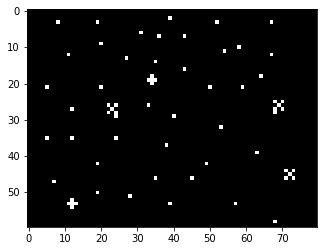

In [16]:
plt.imshow(bwcross,cmap="Greys_r", vmin=0, vmax=255)

Trabalhe no arquivo [ex6.py](./ex6.py)